In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2023-01-18 09:53:51.651373: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-18 09:53:51.913895: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-18 09:53:51.913918: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-18 09:53:53.086759: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
df = pd.read_csv('../../data/dataframes/df.csv')

In [3]:
dict_encoding = { "0:00" : 1,
                    "0:30" : 2,
                    "1:00" : 3,
                    "1:30" : 4,
                    "2:00" : 5,
                    "2:30" : 6,
                    "3:00" : 7,
                    "3:30" : 8,
                    "4:00" : 9,
                    "4:30" : 10,
                    "5:00" : 11,
                    "5:30" : 12,
                    "6:00" : 13,
                    "6:30" : 14,
                    "7:00" : 15,
                    "7:30" : 16,
                    "8:00" : 17,
                    "8:30" : 18,
                    "9:00" : 19,
                    "9:30" : 20,
                    "10:00" : 21,
                    "10:30" : 22,
                    "11:00" : 23, 
                    "11:30" : 24,
                    "12:00" : 25, 
                    "12:30" : 26, 
                    "13:00" : 27, 
                    "13:30" : 28, 
                    "14:00" : 29, 
                    "14:30" : 30, 
                    "15:00" : 31, 
                    "15:30" : 32, 
                    "16:00" : 33, 
                    "16:30" : 34, 
                    "17:00" : 35, 
                    "17:30" : 36, 
                    "18:00" : 37, 
                    "18:30" : 38, 
                    "19:00" : 39, 
                    "19:30" : 40, 
                    "20:00" : 41, 
                    "20:30" : 42, 
                    "21:00" : 43, 
                    "21:30" : 44, 
                    "22:00" : 45, 
                    "22:30" : 46, 
                    "23:00" : 47, 
                    "23:30" : 48
}
df = df.head(48)
#replace the values of the column "timestamp" with the value of the dictionary
df['timestamp'] = df['timestamp'].map(dict_encoding)

#one hot encoding column h_type
df = pd.get_dummies(df, columns=['h_type'])
df

,timestamp,consommation,day,month,h_surface,nb_people,h_type_A
0,1,0.9074,14,12,110,5,1
1,2,1.0415,14,12,110,5,1
2,3,0.5913,14,12,110,5,1
3,4,1.2522,14,12,110,5,1
4,5,1.5268,14,12,110,5,1
5,6,1.4342,14,12,110,5,1
6,7,1.1405,14,12,110,5,1
7,8,1.4629,14,12,110,5,1
8,9,1.2458,14,12,110,5,1
9,10,0.6967,14,12,110,5,1


In [5]:
timestamp = df['timestamp'].values.tolist()

In [6]:
conso_ref = df['consommation'].values.tolist()

In [13]:
model = tf.keras.models.load_model('../../models/model2.h5')
list_pred = []
for i in range (1, 49):
    list_pred.append([i, 15, 12, 110, 5, 1, 0])

list_pred


[[1, 15, 12, 110, 5, 1, 0],
 [2, 15, 12, 110, 5, 1, 0],
 [3, 15, 12, 110, 5, 1, 0],
 [4, 15, 12, 110, 5, 1, 0],
 [5, 15, 12, 110, 5, 1, 0],
 [6, 15, 12, 110, 5, 1, 0],
 [7, 15, 12, 110, 5, 1, 0],
 [8, 15, 12, 110, 5, 1, 0],
 [9, 15, 12, 110, 5, 1, 0],
 [10, 15, 12, 110, 5, 1, 0],
 [11, 15, 12, 110, 5, 1, 0],
 [12, 15, 12, 110, 5, 1, 0],
 [13, 15, 12, 110, 5, 1, 0],
 [14, 15, 12, 110, 5, 1, 0],
 [15, 15, 12, 110, 5, 1, 0],
 [16, 15, 12, 110, 5, 1, 0],
 [17, 15, 12, 110, 5, 1, 0],
 [18, 15, 12, 110, 5, 1, 0],
 [19, 15, 12, 110, 5, 1, 0],
 [20, 15, 12, 110, 5, 1, 0],
 [21, 15, 12, 110, 5, 1, 0],
 [22, 15, 12, 110, 5, 1, 0],
 [23, 15, 12, 110, 5, 1, 0],
 [24, 15, 12, 110, 5, 1, 0],
 [25, 15, 12, 110, 5, 1, 0],
 [26, 15, 12, 110, 5, 1, 0],
 [27, 15, 12, 110, 5, 1, 0],
 [28, 15, 12, 110, 5, 1, 0],
 [29, 15, 12, 110, 5, 1, 0],
 [30, 15, 12, 110, 5, 1, 0],
 [31, 15, 12, 110, 5, 1, 0],
 [32, 15, 12, 110, 5, 1, 0],
 [33, 15, 12, 110, 5, 1, 0],
 [34, 15, 12, 110, 5, 1, 0],
 [35, 15, 12, 110, 5, 1

In [14]:
conso_pred = model.predict(list_pred)
conso_pred

2/2 [==============================] - 0s 3ms/step


array([[59.23024 ],
       [49.362663],
       [47.29452 ],
       [48.575367],
       [48.873222],
       [47.988583],
       [47.263073],
       [46.6129  ],
       [46.117294],
       [45.64233 ],
       [45.13543 ],
       [44.604504],
       [44.272434],
       [44.037155],
       [44.108265],
       [44.438187],
       [44.843487],
       [45.041508],
       [45.229908],
       [45.23981 ],
       [45.18176 ],
       [45.1237  ],
       [45.065647],
       [45.01025 ],
       [44.951714],
       [44.85359 ],
       [44.75546 ],
       [45.603188],
       [46.41763 ],
       [47.577335],
       [48.753925],
       [49.302685],
       [49.683582],
       [49.975803],
       [50.241108],
       [50.5059  ],
       [50.774532],
       [51.043217],
       [51.288303],
       [51.55225 ],
       [51.83582 ],
       [52.11939 ],
       [52.402954],
       [52.686535],
       [52.970097],
       [53.253662],
       [53.537243],
       [53.8208  ]], dtype=float32)

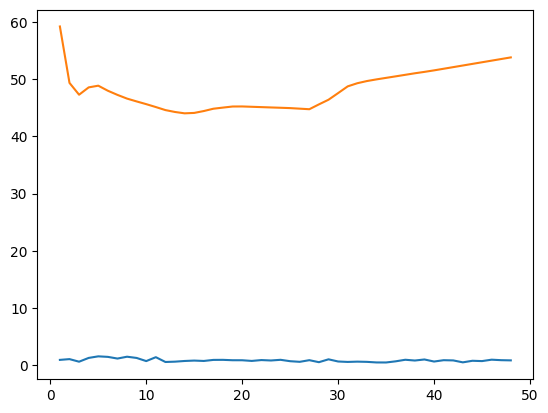

In [15]:
plt.plot(timestamp, conso_ref, label='consommation réelle')
plt.plot(timestamp, conso_pred, label='consommation prédite')
plt.show()